In [1]:
# Load Extensions

# cpu line profiler
%load_ext line_profiler
# memory profiler
%load_ext memory_profiler
# Cython support
%load_ext Cython

# Reload modules before executing user code
%load_ext autoreload
%autoreload 2

# setup backend for matplotlibs plots
%matplotlib inline

In [8]:
# Imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from slow_example import reallySlowGenerateTimeSeriesData

In [3]:
%lprun -f reallySlowGenerateTimeSeriesData data = reallySlowGenerateTimeSeriesData(60*60,1000)

Timer unit: 1e-06 s

Total time: 14.8587 s
File: /Users/patrykattc/projects/git/public/machine-learning/notebook-performance/slow_example.py
Function: reallySlowGenerateTimeSeriesData at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
     6                                               """Generate synthetic data"""
     7                                               
     8         1          4.0      4.0      0.0      time = []
     9         1          1.0      1.0      0.0      signal = []   
    10                                               
    11                                               # generate signal
    12         1          0.0      0.0      0.0      sample_time = 0
    13      3601       1802.0      0.5      0.0      for s in range(seconds):        
    14   3603600    1659755.0      0.5     11.2          for sps in range(sampl

In [6]:
%mprun -f reallySlowGenerateTimeSeriesData data = reallySlowGenerateTimeSeriesData(60*60,1000)

Filename: /Users/patrykattc/projects/git/public/machine-learning/notebook-performance/slow_example.py

Line #    Mem usage    Increment   Line Contents
     5    504.8 MiB    504.8 MiB   def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
     6                                 """Generate synthetic data"""
     7                                 
     8    504.8 MiB      0.0 MiB       time = []
     9    504.8 MiB      0.0 MiB       signal = []   
    10                                 
    11                                 # generate signal
    12    504.8 MiB      0.0 MiB       sample_time = 0
    13    572.6 MiB      0.0 MiB       for s in range(seconds):        
    14    572.6 MiB      0.0 MiB           for sps in range(samples_per_second):
    15    572.6 MiB      0.0 MiB               sample_time += 1/samples_per_second
    16    572.6 MiB      0.0 MiB               noise = random.random()
    17    572.6 MiB      0.0 MiB               scaled_noise = -1 + (noise * 

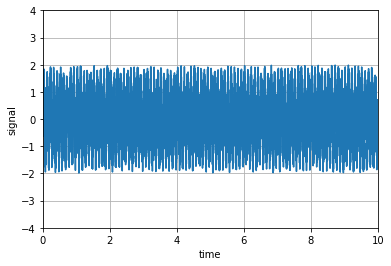

In [9]:
fig,axes=plt.subplots()
plt.plot(data[0], data[1])
plt.xlim(0, 10)
plt.ylim(-4, 4)
plt.xlabel('time')
plt.ylabel('signal')
plt.grid(True)
plt.show()